# Lab #1

# Batch Gradient Descent

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import r2_score
%matplotlib inline

In [3]:
data1 = pd.read_csv("RegData.csv", header=None)
x_Data = data1[0]
y_Data = data1[1]

In [64]:
J_Plot = []
theta0_Plot = []
theta1_Plot = []
epoch_Plot = []

def batch_GD(x_data, y_Data):
    alpha = 0.05
    theta0 = theta1 = 0
    pre_error = np.inf

    for i in range(200):
        y_Predict = theta0 + theta1*x_data
        err_Vec = y_Predict - y_Data
        J_errorFunc = np.dot(err_Vec, err_Vec) / (2*(x_data.size))

        theta0_Plot.append(theta0)
        theta1_Plot.append(theta1)
        J_Plot.append(J_errorFunc)

        grad_Th0 = np.sum(err_Vec) / x_Data.size
        grad_Th1 = np.sum(np.dot(err_Vec, x_Data)) / x_Data.size

        theta0 = theta0 - alpha*grad_Th0
        theta1 = theta1 - alpha*grad_Th1

        epoch_Plot.append(i)
        if (pre_error - J_errorFunc) < 0.001:
            break
        pre_error = J_errorFunc
            
    return (theta0, theta1)

In [65]:
l0, l1 = batch_GD(x_data=x_Data, y_Data=y_Data)
y_Pre_F = l0 + l1*x_Data

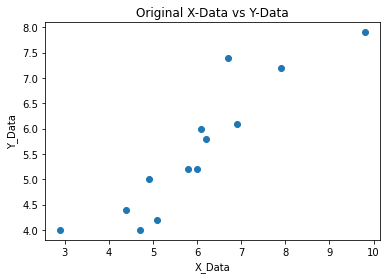

In [66]:
plt.scatter(x_Data, y_Data)
plt.xlabel("X_Data")
plt.ylabel("Y_Data")
plt.title("Original X-Data vs Y-Data")
plt.show()

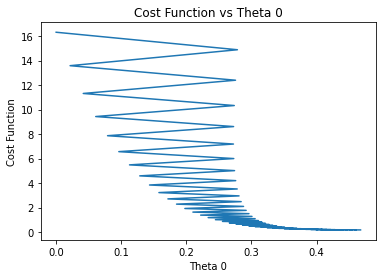

In [67]:
plt.xlabel("Theta 0")
plt.ylabel("Cost Function")
plt.title("Cost Function vs Theta 0")
plt.plot(theta0_Plot, J_Plot)
plt.show()

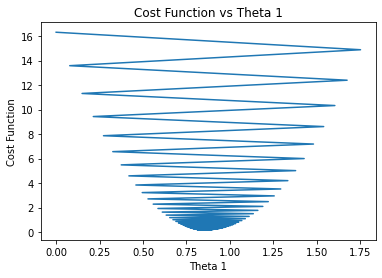

In [68]:
plt.xlabel("Theta 1")
plt.ylabel("Cost Function")
plt.title("Cost Function vs Theta 1")
plt.plot(theta1_Plot, J_Plot)
plt.show()

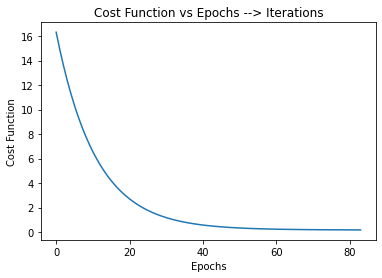

In [69]:
plt.xlabel("Epochs")
plt.ylabel("Cost Function")
plt.title("Cost Function vs Epochs --> Iterations")
plt.plot(epoch_Plot, J_Plot)
plt.show()

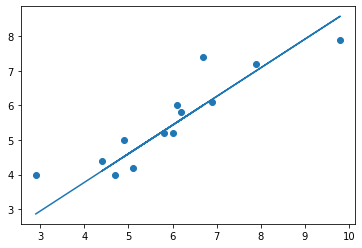

In [70]:
plt.scatter(x_Data, y_Data)
plt.plot(x_Data, y_Pre_F)
plt.show()

In [71]:
r2_score(y_Pre_F, y_Data)

0.8037677406018021